In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
df=pd.read_csv("KNN.csv")

In [5]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [6]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [7]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

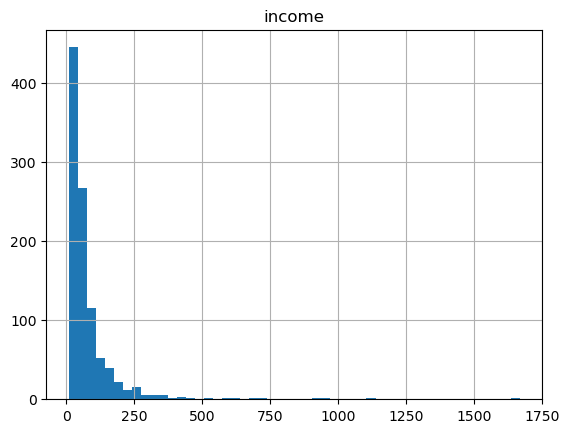

In [9]:
df.hist(column='income',bins=50)

In [10]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

array([[<Axes: title={'center': 'tenure'}>]], dtype=object)

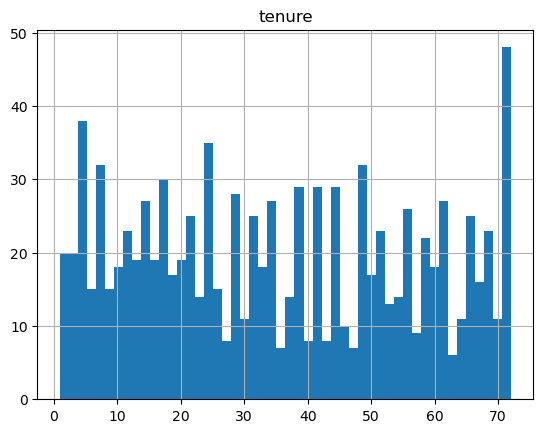

In [11]:
df.hist(column='tenure',bins=50)

In [12]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]

In [14]:
y=df["custcat"].values

In [15]:
X=StandardScaler().fit(X).transform(X.astype(float))

In [16]:
type(X)

numpy.ndarray

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [18]:
print('Train set:',X_train.shape,y_train.shape)
print('Test set:',X_test.shape,y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [19]:
k=4
#train model and predict
model=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
model

KNeighborsClassifier(n_neighbors=4)

In [20]:
y_pred = model.predict(X_test)

In [22]:
print('Train set Accuracy:',accuracy_score(y_train,model.predict(X_train)))
print('Test set Accuracy:',accuracy_score(y_test,y_pred))

Train set Accuracy: 0.56375
Test set Accuracy: 0.35


In [23]:
Ks=20
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict
    model=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,y_pred)
    
    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
mean_acc

array([0.29 , 0.315, 0.34 , 0.35 , 0.35 , 0.33 , 0.335, 0.31 , 0.32 ,
       0.37 , 0.355, 0.36 , 0.355, 0.37 , 0.37 , 0.39 , 0.385, 0.365,
       0.4  ])

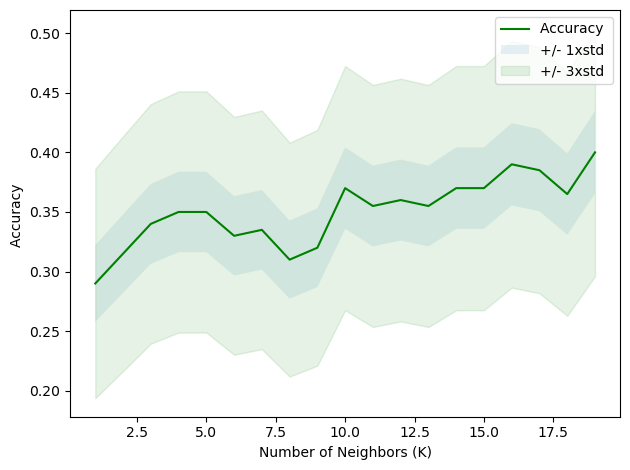

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc-3*std_acc,mean_acc+3*std_acc,alpha=0.10,color='green')
plt.legend(('Accuracy ','+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [26]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.4 with k= 19
